In [1]:
# tryExtractUsImgRectangle.
# eton@241208.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt




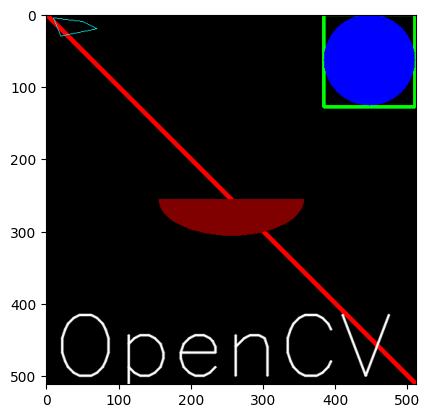

In [2]:
def drawShapesInImg():
    img=np.zeros((512,512,3), np.uint8)
    
    colorRed=(255,0,0)
    colorGreen=(0,255,0)
    colorBlue=(0,0,255)
     # Draw a diagonal blue line with thickness of 5 px
    cv2.line(img,(0,0),(511,511),colorRed,5)
    cv2.rectangle(img,(384,0),(510,128), colorGreen,3)
    cv2.circle(img,(447,63), 63, colorBlue, -1)
    ellipseCenter=(256,256)
    elliAxLongShort=(100,50)
    # 3,4,5  param: 椭圆顺时针旋转角度, 起始角度, 结束角度;
    cv2.ellipse(img, ellipseCenter,elliAxLongShort,0,0,180, 128,-1)
    
    pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
    pts = pts.reshape((-1,1,2))
    img = cv2.polylines(img,[pts],True,(0,255,255))
    # reshape 的第一个参数为-1, 说明一维的长度是根据后面维度的䕐算出来的。

    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

    return img
img=drawShapesInImg()
plt.imshow(img)

In [3]:
flags=[i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags[1:10])

['COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR']


In [4]:
import numpy as np
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)
# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
#while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

IndentationError: unexpected indent (3438033065.py, line 11)

In [49]:
imgfile=r"/mnt/f/241129-zhipu-thyroid-datas/01-mini-batch/0001.dcm_frms/frm-0001.png"
# Load the image
image = cv2.imread(imgfile)

# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# Split the HSV image into its channels
h, s, v = cv2.split(hsv_image)

<Figure size 5100x5100 with 0 Axes>

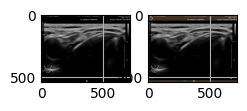

<Figure size 5100x5100 with 0 Axes>

In [56]:

imghsv=cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
frame=image

# define range of grayscale color in HSV
lower_blue = np.array([0,0,0])
upper_blue = np.array([179, 34,255])
# Threshold the HSV image to get only blue colors
mask = cv2.inRange(imghsv, lower_blue, upper_blue)
# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame,frame, mask= mask)
#plt.imshow('frame',frame)
#plt.imshow('mask',mask)
plt.subplot(1,2,1)
plt.imshow(res)
plt.subplot(1,2,2)
plt.imshow(frame)

#plt.imshow(imghsv)
width=51
height=51
plt.figure(figsize=(width, height))

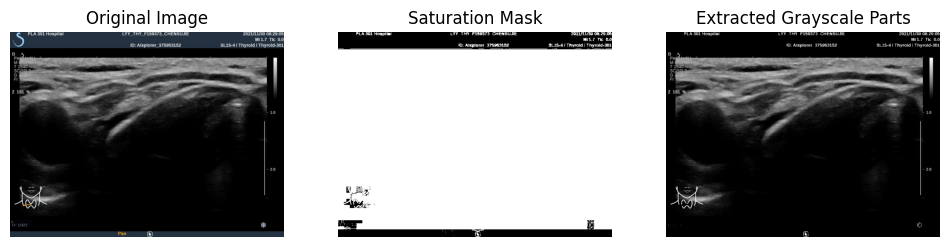

In [8]:
# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into its channels
h, s, v = cv2.split(hsv_image)

# Threshold the saturation channel to create a mask
_, mask = cv2.threshold(s, 30, 255, cv2.THRESH_BINARY_INV)

# Apply the mask to the original image to extract the grayscale parts
grayscale_parts = cv2.bitwise_and(image, image, mask=mask)

# Convert the result to grayscale (if needed)
grayscale_image = cv2.cvtColor(grayscale_parts, cv2.COLOR_BGR2GRAY)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Saturation Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Extracted Grayscale Parts')
plt.axis('off')

plt.show()

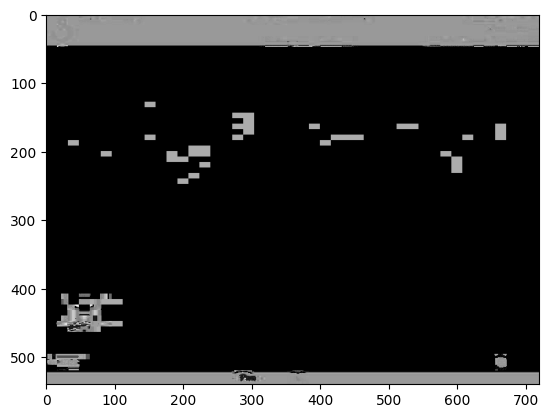

In [10]:
plt.imshow(h, 'gray')

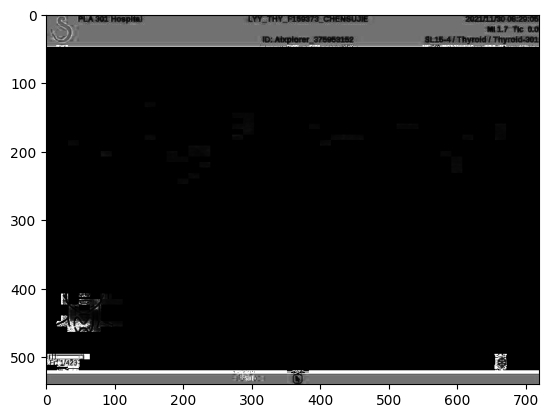

In [11]:
plt.imshow(s, 'gray')

In [44]:
def drawImageMatrixAs2dSurface(vals):
    print(f"{v.shape}")
    X=np.zeros(vals.shape)
    for irow in range(X.shape[0]):
        X[irow,:]=255*irow/X.shape[0]
    Y=np.zeros(v.shape)
    for icol in range(Y.shape[1]):
        Y[:,icol]=256*icol/Y.shape[1]
    #plt.imshow(v, 'gray')
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.plot_surface(X, Y, vals)
    plt.show()

(540, 720)


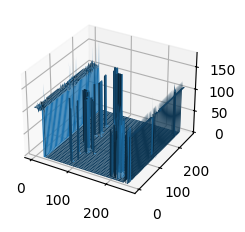

In [50]:
drawImageMatrixAs2dSurface(h)

(540, 720)


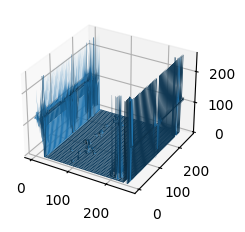

In [51]:
drawImageMatrixAs2dSurface(s)

(540, 720)


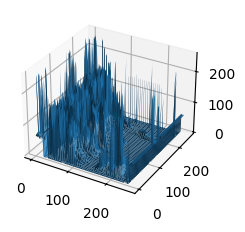

In [52]:
drawImageMatrixAs2dSurface(v)

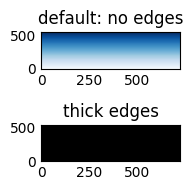

In [48]:
fig, (ax0, ax1) = plt.subplots(2, 1)

c = ax0.pcolor(X)
ax0.set_title('default: no edges')

c = ax1.pcolor(Y, edgecolors='k', linewidths=4)
ax1.set_title('thick edges')

#fig.tight_layout()
plt.show()

debug01: (40,), (40,), [-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]
debug02: (40, 40), (40, 40), [-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]
debug03: (40, 40)


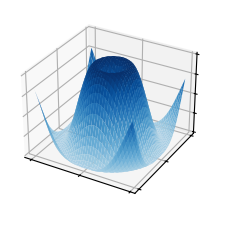

In [19]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm

plt.style.use('_mpl-gallery')

# Make data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
print(f"debug01: {X.shape}, {Y.shape}, {X}")
X, Y = np.meshgrid(X, Y)
print(f"debug02: {X.shape}, {Y.shape}, {X[0,:]}")
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print(f"debug03: {Z.shape}")

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

In [ ]:


# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Apply the Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# Draw the detected lines on the image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.axis('off')
plt.show()

# Extract the relevant area
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # Define the region of interest (ROI) based on the detected lines
        if abs(y1 - y2) < 10:  # Horizontal line
            roi = image[min(y1, y2):max(y1, y2), :]
        elif abs(x1 - x2) < 10:  # Vertical line
            roi = image[:, min(x1, x2):max(x1, x2)]

        # Display the ROI
        plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        plt.title('Region of Interest')
        plt.axis('off')
        plt.show()